In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import train_test_split
import spacy

In [2]:
pd.set_option("display.max_colwidth",None)

In [19]:
X_train = pd.read_csv('train_data.csv')
X_test = pd.read_csv('test_data.csv')

In [20]:
X_train[X_train.label == 1]

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenny #kentucky
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'm proud! #mailboxpride #liberalisme
31947,31948,1,@user @user you don't have the balls to hashtag me as a but you say i am to weasel away.. lumpy tony.. dipshit.
31948,31949,1,"makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!"


In [21]:
X_train[X_train.label == 0]

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first time in 2 years
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad


<AxesSubplot:>

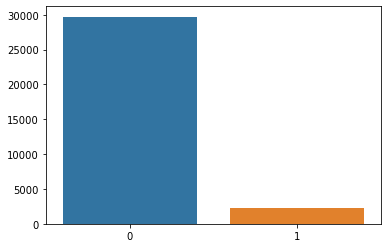

In [22]:
name=['0','1']
values=[X_train[X_train.label == 0].shape[0],X_train[X_train.label == 1].shape[0]]
sns.barplot(x=name,y=values) 

In [23]:
X_test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"
...,...,...
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [24]:
nlp = spacy.load('en_core_web_sm') 

In [25]:
def clean_it(tweet,model):
    
    tweet=tweet.str.replace('@[\w]*','',regex=True)
    
    tweet=tweet.str.replace('[^a-zA-Z]',' ',regex=True) 
    
    with model.select_pipes(enable = ['tagger','lemmatizer','attribute_ruler','tok2vec']):
        token=pd.Series(model.pipe(tweet))

    filtered_tokens = pd.Series([[x.lemma_ for x in tok if x.is_stop == False] for tok in token])
    
    for i in range(len(filtered_tokens)):
        filtered_tokens[i] = ' '.join(filtered_tokens[i])
        
    return filtered_tokens


In [26]:
X_train.tweet = clean_it(X_train.tweet,nlp)
X_test.tweet = clean_it(X_test.tweet,nlp)

In [27]:
X_test

,id,tweet
0,31963,studiolife aislife require passion dedication willpower find newmaterial
1,31964,white supremacist want new bird movie s
2,31965,safe way heal acne altwaystoheal healthy heal
3,31966,hp cursed child book reservation yes harrypotter pottermore favorite
4,31967,rd bihday amazing hilarious nephew eli ahmir uncle dave love miss
...,...,...
17192,49155,think factory leave right polarisation trump uselection leadership politic brexit blm gt
17193,49156,feel like mermaid hairflip neverready formal wedding gown dress mermaid
17194,49157,hillary campaign today ohio omg amp word like asset amp liability clinton thee word radicalization
17195,49158,happy work conference right mindset lead culture development organization work mindset


In [12]:
y=X_train.pop('label')

In [28]:
Xtrain,Xvalid,ytrain,yvalid=train_test_split(X_train,y,random_state=4,test_size=0.3)

In [29]:
Xtrain[ytrain == 1]

,id,label,tweet
25232,25233,1,girl maga
27666,27667,1,haha wow n word amp equivalent arabic abd mean slave
11432,11433,1,hamzayusuf apologist like ris jetlagge doubletree hilton london
21940,21941,1,ag pick jeff session scrub racism record tho argue felony trumpsamerica
10945,10946,1,s racist troll love spread word
...,...,...,...
9959,9960,1,fight side argument yesterday
13502,13503,1,d think blacklivesmatter b protest plannedparenthood doesn t fit ideology
8170,8171,1,completely justified comment apologize
29065,29066,1,feminismiscancer feminismisterrorism feminismmuktbharat malevote ignore


In [30]:
tfidf = TfidfVectorizer(ngram_range=(1,3),max_features=800000)

In [31]:
tfidf_train_set = tfidf.fit_transform(Xtrain.tweet) 
tfidf_valid_set = tfidf.transform(Xvalid.tweet)

In [32]:
svm = SGDClassifier(max_iter=1000,alpha =1e-5,loss='hinge',penalty='l2') 

svm.fit(tfidf_train_set,ytrain)  
ypred=svm.predict(tfidf_valid_set)

print(accuracy_score(yvalid,ypred))
print(f1_score(yvalid,ypred))

0.9668370007300031
0.7414634146341463


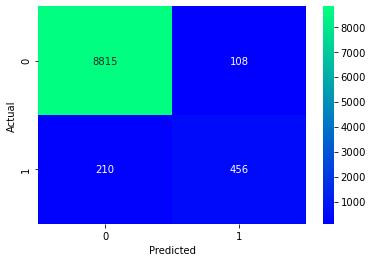

In [33]:
confusion_matrix = pd.crosstab(yvalid,ypred,rownames=['Actual'],colnames=['Predicted'])

sns.heatmap(confusion_matrix,annot = True,cmap='winter',fmt='d')
plt.show()

In [34]:
tfidf_train = tfidf.fit_transform(X_train.tweet)
svm.fit(tfidf_train,y)  
tfidf_test = tfidf.transform(X_test.tweet) 
y_test_pred = svm.predict(tfidf_test) 

In [35]:
X_test

,id,tweet
0,31963,studiolife aislife require passion dedication willpower find newmaterial
1,31964,white supremacist want new bird movie s
2,31965,safe way heal acne altwaystoheal healthy heal
3,31966,hp cursed child book reservation yes harrypotter pottermore favorite
4,31967,rd bihday amazing hilarious nephew eli ahmir uncle dave love miss
...,...,...
17192,49155,think factory leave right polarisation trump uselection leadership politic brexit blm gt
17193,49156,feel like mermaid hairflip neverready formal wedding gown dress mermaid
17194,49157,hillary campaign today ohio omg amp word like asset amp liability clinton thee word radicalization
17195,49158,happy work conference right mindset lead culture development organization work mindset


In [36]:
X_test['label'] = y_test_pred

<AxesSubplot:>

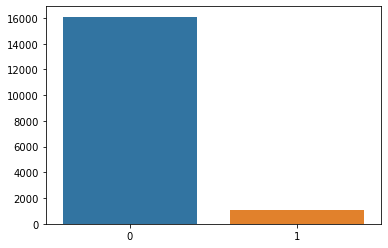

In [37]:
name = ['0','1']
values = [X_test[X_test.label==0].shape[0],X_test[X_test.label==1].shape[0]]
sns.barplot(x=name,y=values)  

In [38]:
X_test[X_test.label == 1]

,id,tweet,label
1,31964,white supremacist want new bird movie s,1
19,31982,think factory bbc neutrality right wing fascism politic medium blm brexit trump leadership gt,1
26,31989,chick get fuck hot naked lady,1
30,31993,ll m m thick woman blacktina,1
33,31996,suppo taiji fisherman bullying racism tweet taiji thecove seashepherd,1
...,...,...,...
17125,49088,careful criticize obama decision israel amp sanction russiahacke liberal consider,1
17128,49091,uk government s new anti semitism definition conflate valid criticism israel opendemocracy,1
17176,49139,racist pay,1
17188,49151,black professor demonize propose nazi style confiscation white asset like s germany break,1


In [39]:
X_test[X_test.label==0]

,id,tweet,label
0,31963,studiolife aislife require passion dedication willpower find newmaterial,0
2,31965,safe way heal acne altwaystoheal healthy heal,0
3,31966,hp cursed child book reservation yes harrypotter pottermore favorite,0
4,31967,rd bihday amazing hilarious nephew eli ahmir uncle dave love miss,0
5,31968,choose momtip,0
...,...,...,...
17191,49154,damn tuff ruff muff techno city ng web ukhx int web hardcore gabba vk,0
17193,49156,feel like mermaid hairflip neverready formal wedding gown dress mermaid,0
17194,49157,hillary campaign today ohio omg amp word like asset amp liability clinton thee word radicalization,0
17195,49158,happy work conference right mindset lead culture development organization work mindset,0
